<a href="https://colab.research.google.com/github/Bhavya-2k03/Comparative_analysis_of_Deep_learning_models_for_Surgical_Tool_Detection/blob/main/DenseNet201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sn

In [ ]:
# getting the cholec-tinytools dataset
path=tf.keras.utils.get_file("cholec-tinytools.zip",'https://s3.unistra.fr/camma_public/github/ai4surgery/cholec-tinytools.zip',extract=True)
path=path.strip(".zip")
print(path)

41648128/41633689 [==============================] - 4s 0us/step
/root/.keras/datasets/cholec-tinytools


In [ ]:
Batch_size=20 #batch_size
Image_size=(86,128) #image size 
Class_names=['grasper', 'hook', 'scissor', 'clipper'] # name of surgical tools

In [ ]:
train_set=tf.keras.preprocessing.image.DirectoryIterator(
    path+"/train", #train images path   
    # preprocessing images 
    # rescaling is being done to reduce computational power
    # images are being rotated randomly from a range of 0 to 20 degrees at the time of training so that our model classifies tools correctly even if they are being rotated(which is a common case in surguries )
    tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,rotation_range=20),
    batch_size=Batch_size,
    target_size=Image_size,
    classes=Class_names,
    shuffle=True,
)
validation_set=tf.keras.preprocessing.image.DirectoryIterator(
    path+"/validation",# validation images path.
    # preprocessing images 
    # rescaling is again being done to reduce computational power
    tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255),
    batch_size=Batch_size,
    target_size=Image_size,
    classes=Class_names
)
test_set=tf.keras.preprocessing.image.DirectoryIterator(
    path+'/test',# test images path
    # preprocessing images 
    # rescaling is again being done to reduce computational power
    tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255),
    batch_size=Batch_size,
    target_size=Image_size,
    classes=Class_names
)

Found 1200 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Found 599 images belonging to 4 classes.


In [ ]:
#importing DenseNet201 (convolution layers only) from keras.applications
Dense_net=tf.keras.applications.DenseNet201(weights="imagenet",include_top=False)

In [ ]:
# summary of our imported model
Dense_net.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
                                64)                                                     

In [ ]:
# building the model
model=tf.keras.models.Sequential()
# adding imported DenseNet201 
model.add(Dense_net)
# Adding GAP layer
model.add(tf.keras.layers.GlobalAveragePooling2D(name="GAP"))
# Adding dense layer with 4 nodes(because total number of classes are 4) to get final prediction
model.add(tf.keras.layers.Dense(4,activation=tf.keras.activations.softmax,name="Prediction"))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),
              metrics=["accuracy"])

In [ ]:
model.summary()
# summary of our final model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, None, None, 1920)  18321984  
                                                                 
 GAP (GlobalAveragePooling2D  (None, 1920)             0         
 )                                                               
                                                                 
 Prediction (Dense)          (None, 4)                 7684      
                                                                 
Total params: 18,329,668
Trainable params: 18,100,612
Non-trainable params: 229,056
_________________________________________________________________


In [ ]:
history = model.fit(train_set, validation_data=validation_set, epochs=35,verbose=1,callbacks=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=5,restore_best_weights=True))
# early stopping method of callbacks is applied so that the model does not overfit 

Epoch 1/20
60/60 [==============================] - 45s 229ms/step - loss: 1.2708 - accuracy: 0.4083 - val_loss: 1.3115 - val_accuracy: 0.4424
Epoch 2/20
60/60 [==============================] - 11s 183ms/step - loss: 1.2620 - accuracy: 0.4258 - val_loss: 1.2348 - val_accuracy: 0.4858
Epoch 3/20
60/60 [==============================] - 11s 186ms/step - loss: 1.2517 - accuracy: 0.4792 - val_loss: 1.2234 - val_accuracy: 0.5292
Epoch 4/20
60/60 [==============================] - 11s 183ms/step - loss: 1.2410 - accuracy: 0.5017 - val_loss: 1.2185 - val_accuracy: 0.5593
Epoch 5/20
60/60 [==============================] - 11s 187ms/step - loss: 1.2340 - accuracy: 0.5358 - val_loss: 1.2140 - val_accuracy: 0.5793
Epoch 6/20
60/60 [==============================] - 11s 186ms/step - loss: 1.2216 - accuracy: 0.5775 - val_loss: 1.2067 - val_accuracy: 0.5977
Epoch 7/20
60/60 [==============================] - 11s 184ms/step - loss: 1.2166 - accuracy: 0.6042 - val_loss: 1.1936 - val_accuracy: 0.6110

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save_weights("DenseNet201.h5")

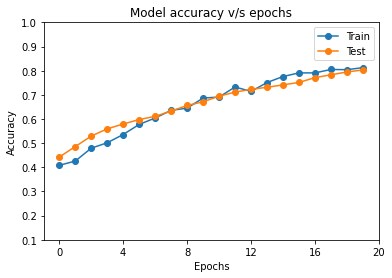

In [ ]:
#plotting graph of accuracy vs number of epochs 
plt.plot(history.history['accuracy'],marker="o") #plotting model accuracy on train set
plt.plot(history.history['val_accuracy'],marker="o") # plotting model accuracy on validation set
plt.title('Model accuracy v/s epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xticks([0,4,8,12,16,20]) # scaling of x axis 
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]) # scaling of y axis
plt.legend(['Train', 'Test']) #adding legends
plt.show()

In [ ]:
his_tory=model.evaluate(test_set) #evaluating model on test set 

30/30 [==============================] - 2s 69ms/step - loss: 0.1437 - accuracy: 0.9466


In [ ]:
#visualizing the results on a few random images from the test set

# Defining the figure using matplotlib.pyplot function
fig, axes = plt.subplots(1,4, figsize=(15, 15))               
random_batch =  random.randint(0, len(test_set)-1)
random_images, random_labels = test_set[random_batch]
pre_dictions = model.predict(random_images)

# For loops are used to iterate over a sequence, in this case for each iteration images being plotted 
for image_number, axs in enumerate(axes):                     
    img = random_images[image_number]
    axs.imshow(img)
    axs.axis("off")
    prediction = Class_names[np.argmax(pre_dictions[image_number])]
    label = Class_names[np.argmax(random_labels[image_number])]
    axs.set_title("Predicted Class: {} \n True Class: {}".format(prediction, label))

In [ ]:
predictions=[]
labels=[]
prediction_list=[]
label_list=[]
for batch in range (0,30):
  images,label_s = test_set[batch]
  predictions.append(model.predict(images))
  labels.append(label_s)
  for x,y in zip(predictions,labels):
    for image_number in x:
      prediction_list.append(image_number)
    for label_number in y:
      label_list.append(label_number)
       
final_predictions_list=[]
final_label_list=[]
for image_number in range(0,599):
    final_predictions_list.append(np.argmax(prediction_list[image_number]))
    final_label_list.append(np.argmax(label_list[image_number]))
    

In [ ]:
# printing prediction by model and its corresponding label
print(final_predictions_list,"\n",final_label_list) 

[3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 0, 2, 2, 3, 3, 1, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 0, 2, 2, 3, 1, 2, 2, 1, 2, 2, 3, 2, 3, 2, 0, 3, 2, 3, 3, 2, 0, 2, 3, 1, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 1, 3, 0, 2, 3, 2, 0, 2, 2, 0, 0, 3, 0, 3, 3, 2, 0, 0, 2, 2, 3, 3, 2, 3, 0, 2, 3, 3, 3, 3, 1, 3, 2, 3, 3, 2, 3, 0, 2, 0, 3, 0, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 0, 2, 3, 3, 1, 1, 2, 3, 2, 3, 0, 2, 2, 3, 1, 1, 3, 3, 0, 0, 2, 2, 1, 3, 1, 3, 2, 0, 2, 3, 3, 3, 2, 2, 3, 3, 3, 1, 2, 3, 3, 0, 0, 3, 2, 2, 3, 3, 2, 3, 0, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 0, 3, 3, 2, 2, 2, 3, 0, 2, 3, 2, 2, 1, 2, 2, 3, 0, 2, 0, 3, 1, 3, 2, 0, 0, 3, 3, 0, 2, 2, 0, 0, 1, 2, 3, 0, 2, 3, 2, 2, 2, 1, 2, 2, 2, 3, 0, 3, 2, 3, 2, 2, 3, 3, 2, 3, 0, 2, 3, 2, 1, 3, 2, 3, 3, 0, 1, 2, 1, 3, 2, 3, 0, 1, 3, 3, 2, 3, 1, 2, 0, 1, 0, 2, 3, 3, 0, 2, 3, 3, 0, 3, 2, 0, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 0, 0, 2, 0, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 0, 3, 3, 3, 2, 0, 3, 3, 3, 3, 2, 3, 2, 0, 2, 0, 3, 0, 1, 2, 3, 1, 2, 3, 2, 3, 3, 1, 3, 

In [ ]:
# Now there are 4 major parametres to judge a classification model -> accuracy , precision , f1_score , recall_score
# Hence we wil be calculating them one by one

In [ ]:
from sklearn.metrics import precision_score
precision_score(final_label_list,final_predictions_list, average='weighted') # precision 

0.9453007704476899

In [ ]:
from sklearn.metrics import f1_score
f1_score(final_label_list,final_predictions_list, average='weighted')# f1 score

0.9445683227993679

In [ ]:
from sklearn.metrics import recall_score
recall_score(final_label_list,final_predictions_list,average="weighted")# recall_score

0.9465776293823038

In [ ]:
cm=tf.math.confusion_matrix(final_label_list,final_predictions_list)# confusion matrix 
print(cm)

tf.Tensor(
[[ 98   2   1   2]
 [  7  39   4   7]
 [  1   0 226   2]
 [  1   3   2 204]], shape=(4, 4), dtype=int32)


Text(69.0, 0.5, 'Truth')

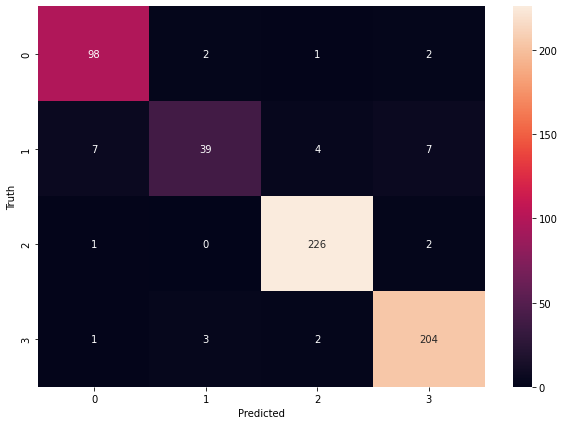

In [ ]:
plt.figure(figsize=(10,7)) # visualizing confusion_matrix using heat map 
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')